必要なライブラリのインポート

データセットの読み込み、データの基本的な確認

In [6]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# データセットを読み込む
df = pd.read_csv('/content/train.csv', header=0, index_col=0)

# データの確認
print(df.head())
print(df.info())
print(df.describe())


    index  elevation  aspect  slope  distance_water  distance_town  \
0  215988     2767.0    66.0   17.0           210.0         1190.0   
1  424155     2724.0   160.0   19.0            60.0         1350.0   
2  274437     2360.0    65.0    7.0           127.0         1377.0   
3   65944     2995.0    45.0    4.0           285.0         5125.0   
4   11015     2400.0   106.0   27.0           150.0          342.0   

   distance_fire        hillshade_index area_type soil_type     Target  
0         2251.0   0.0:234.0:204.0:96.0         B    type30  ツイステッドパイン  
1         2514.0  0.0:236.0:240.0:127.0         B    type16  ツイステッドパイン  
2          339.0  0.0:227.0:226.0:134.0         C     type5   ポンデローザマツ  
3         5706.0  0.0:221.0:231.0:146.0         A    type11  ツイステッドパイン  
4          811.0   0.0:253.0:196.0:51.0         B     type3   ポンデローザマツ  
<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column           Non-Null Coun

##データセットの読み込み

In [3]:
# データの確認
print(df.head())  # データの先頭を表示
print(df.info())  # データの情報を表示
print(df.describe())  # データの統計量を表示
print(df.isnull().sum())  # 欠損値の確認


    index  elevation  aspect  slope  distance_water  distance_town  \
0  215988     2767.0    66.0   17.0           210.0         1190.0   
1  424155     2724.0   160.0   19.0            60.0         1350.0   
2  274437     2360.0    65.0    7.0           127.0         1377.0   
3   65944     2995.0    45.0    4.0           285.0         5125.0   
4   11015     2400.0   106.0   27.0           150.0          342.0   

   distance_fire        hillshade_index area_type soil_type     Target  
0         2251.0   0.0:234.0:204.0:96.0         B    type30  ツイステッドパイン  
1         2514.0  0.0:236.0:240.0:127.0         B    type16  ツイステッドパイン  
2          339.0  0.0:227.0:226.0:134.0         C     type5   ポンデローザマツ  
3         5706.0  0.0:221.0:231.0:146.0         A    type11  ツイステッドパイン  
4          811.0   0.0:253.0:196.0:51.0         B     type3   ポンデローザマツ  
<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column           Non-Null Coun

##データを調べる

Index(['index', 'elevation', 'aspect', 'slope', 'distance_water',
       'distance_town', 'distance_fire', 'hillshade_index', 'area_type',
       'soil_type', 'Target'],
      dtype='object')
index                int64
elevation          float64
aspect             float64
slope              float64
distance_water     float64
distance_town      float64
distance_fire      float64
hillshade_index     object
area_type           object
soil_type           object
Target              object
dtype: object


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

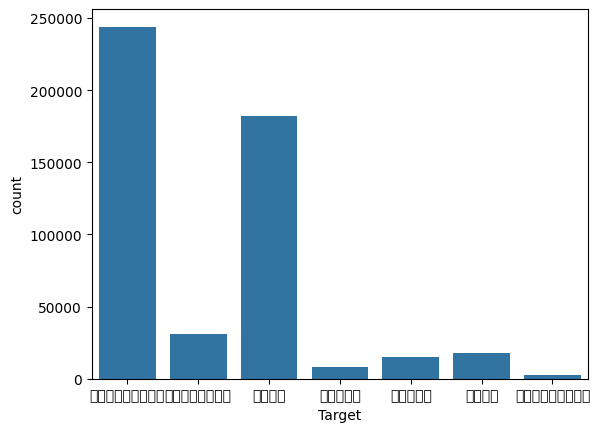

In [4]:
# カラムの確認
print(df.columns)

# データ型の確認
print(df.dtypes)

# ターゲット変数の分布確認
sns.countplot(x='Target', data=df)
plt.show()


##適切な前処理

In [7]:
# hillshade_index を ':' で分割して新しいカラムに展開
hillshade_df = df['hillshade_index'].str.split(':', expand=True).astype(float)
hillshade_df.columns = ['hillshade_0', 'hillshade_1', 'hillshade_2', 'hillshade_3']

# 元のカラムを削除し、新しいカラムを追加
df = df.drop(columns=['hillshade_index'])
df = pd.concat([df, hillshade_df], axis=1)

# ダミー変数に変換
df = pd.get_dummies(df, columns=['area_type', 'soil_type', 'Target'])

# ターゲット変数の列を作成
target_cols = [col for col in df.columns if col.startswith('Target')]
df['Target'] = df[target_cols].idxmax(axis=1)

# 元のターゲット変数のダミー変数を削除
df = df.drop(columns=target_cols)

# データの確認
print(df.head())
print(df.info())


    index  elevation  aspect  slope  distance_water  distance_town  \
0  215988     2767.0    66.0   17.0           210.0         1190.0   
1  424155     2724.0   160.0   19.0            60.0         1350.0   
2  274437     2360.0    65.0    7.0           127.0         1377.0   
3   65944     2995.0    45.0    4.0           285.0         5125.0   
4   11015     2400.0   106.0   27.0           150.0          342.0   

   distance_fire  hillshade_0  hillshade_1  hillshade_2  ...  \
0         2251.0          0.0        234.0        204.0  ...   
1         2514.0          0.0        236.0        240.0  ...   
2          339.0          0.0        227.0        226.0  ...   
3         5706.0          0.0        221.0        231.0  ...   
4          811.0          0.0        253.0        196.0  ...   

   soil_type_type37  soil_type_type38  soil_type_type39  soil_type_type4  \
0             False             False             False            False   
1             False             False     

In [8]:
# 特徴量とターゲットに分ける
X = df.drop('Target', axis=1)
y = df['Target']

In [10]:
# データのダウンサンプリング（例として10%だけ使用）
X, _, y, _ = train_test_split(X, y, test_size=0.9, random_state=42)

In [11]:
# 訓練データとテストデータに分ける
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 特徴量の標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## モデルの作成と学習

In [13]:
# モデルの作成
model = RandomForestClassifier(n_estimators=100, random_state=42)

# モデルの学習
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## モデルの評価

In [14]:
# トレーニングデータの精度
train_acc = model.score(X_train, y_train)
print(f'Train Accuracy: {train_acc}')

# 検証データの精度
val_acc = model.score(X_val, y_val)
print(f'Validation Accuracy: {val_acc}')


Train Accuracy: 1.0
Validation Accuracy: 0.814


## 精度の検証

In [16]:
# 予測結果の取得
y_pred = model.predict(X_val)

# 精度の検証
print(classification_report(y_val, y_pred))


                  precision    recall  f1-score   support

     Target_エゾマツ       0.84      0.77      0.81       364
Target_セイヨウハコヤナギ       0.00      0.00      0.00         2
Target_ツイステッドパイン       0.82      0.90      0.86       487
    Target_トガサワラ       0.67      0.30      0.42        33
 Target_ポンデローザマツ       0.71      0.88      0.78        66
     Target_ムゴマツ       0.81      0.71      0.76        31
    Target_ヤマナラシ       1.00      0.24      0.38        17

        accuracy                           0.81      1000
       macro avg       0.69      0.54      0.57      1000
    weighted avg       0.81      0.81      0.81      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## sklearn.metrics.classification_report

In [17]:
# sklearn.metrics.classification_report を使う
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print("Classification Report:")
print(report)

Classification Report:
                  precision    recall  f1-score   support

     Target_エゾマツ       0.84      0.77      0.81       364
Target_セイヨウハコヤナギ       0.00      0.00      0.00         2
Target_ツイステッドパイン       0.82      0.90      0.86       487
    Target_トガサワラ       0.67      0.30      0.42        33
 Target_ポンデローザマツ       0.71      0.88      0.78        66
     Target_ムゴマツ       0.81      0.71      0.76        31
    Target_ヤマナラシ       1.00      0.24      0.38        17

        accuracy                           0.81      1000
       macro avg       0.69      0.54      0.57      1000
    weighted avg       0.81      0.81      0.81      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
